# Mall Customer Segmentation

## 1. Motivation

Let's imagine you're owning a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score, which is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

The main aim of this problem is learning the purpose of the customer segmentation concepts, also known as market basket analysis, trying to understand customers and sepparate them in different groups according to their preferences, and once the division is done, this information can be given to marketing team so they can plan the strategy accordingly.

All information and data related to this problem can be found [here](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

## 2. Data Information

This dataset is composed by the following five features:

**CustomerID:** Unique ID assigned to the customer

**Gender:** Gender of the customer

**Age:** Age of the customer

**Annual Income (k\$):** Annual Income of the customer

**Spending Score (1-100):** Score assigned by the mall based on customer behavior and spending nature.

In this particular dataset we have 200 samples to study.

## 3. Dependences
Here we can find the libraries we will use in order to develop a solution for this problem.

- **numpy|pandas:** Will help us treat and explore the data, and execute vector and matrix operations.
- **matplotlib|seaborn:** Will help us plot the information so we can visualize it in different ways and have a better understanding of it.
- **plotly:** Will also help us plotting data in a fancy way.
- **sklearn:** Will provide all necessary tools to train our models and test them afterwards.

In [51]:
'''Main'''
import numpy as np 
import pandas as pd

'''Data Viz'''
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
import plotly.express as px

'''Clustering'''
from sklearn.cluster import KMeans

'''Dimensionality Reduction'''
import umap
from sklearn.decomposition import PCA

'''Metrics'''
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score, silhouette_score

'''Warnings'''
import warnings
# warnings.filterwarnings("ignore")

## 4. Data Exploration

In this section we are doing a little bit of data exploration, checking for null values, object data types and other things we might consider in order to keep our data clean and well structured.

In [2]:
#We read the csv and print the first 5 rows
df = pd.read_csv(f"data/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Checking the size of our data
df.shape

(200, 5)

As we have observed the name of some columns is quite complex and can be changed to a simpler name so we can access our data easier.

In [4]:
#Changing the name of some columns
df = df.rename(columns={'Annual Income (k$)': 'Annual_income', 
                        'Spending Score (1-100)': 'Spending_score',
                        'Genre': 'Gender'
                       })

In [5]:
#Looking for null values
df.isna().sum()

CustomerID        0
Gender            0
Age               0
Annual_income     0
Spending_score    0
dtype: int64

In [6]:
#Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_income   200 non-null    int64 
 4   Spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Since Gender is not a numerical value but an object, we are going to replace these values. Female will be 0 and Male will be 1 from now on.

In [7]:
#Replacing objects for numerical values
df['Gender'].replace(['Female','Male'], [0,1],inplace=True)

In [8]:
#Checking values have been replaced properly
df.Gender

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

## 5. Data Visualization

Now it's the moment to visualize our data and plot important information so we can see the different values our data has and its behaviour. To do so, we are only going to consider the following features: Annual_income, Spending_score and Age. Gender will only be used to make data separation so we can differentiate values for men and women.

To begin with, we are plotting the histograms for each of the three features we said we would look into:

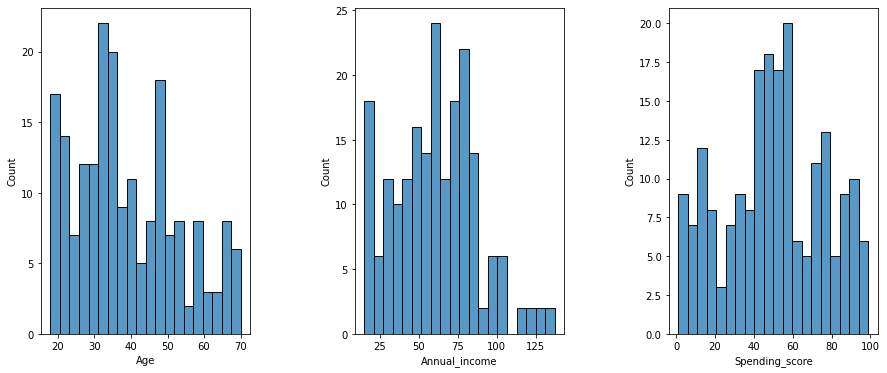

In [9]:
#Density estimation of values using distplot
plt.figure(1 , figsize = (15 , 6))
feature_list = ['Age','Annual_income', "Spending_score"]
pos = 1 
for i in feature_list:
    plt.subplot(1 , 3 , pos)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(data=df[i], bins=20)
#     sns.displot(data=df[i], kind='kde')
    pos = pos + 1
plt.show()

In these histograms we can observe that the distribution of these values resembles a Gaussian distribution, where the vast majority of the values lay in the middle with some exceptions in the extremes.

Now that we have plot the distribution of values through histograms, let's plot the relation between variables using gender as a class distinction. In order to do so we are using the function pairplot given by the Seaborn library, we are using some parameters as well so we can visualize the gender class separation better.

That said, before doing that, let's check how many women and men there are in our data!

0    112
1     88
Name: Gender, dtype: int64

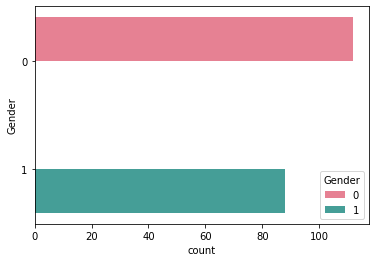

In [10]:
#Count and plot gender
sns.countplot(y = 'Gender', data = df, palette="husl", hue = "Gender")
df["Gender"].value_counts()

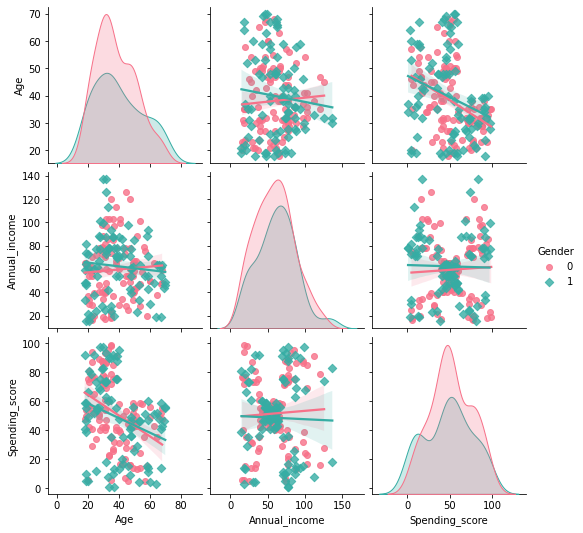

In [11]:
#Pairplot with variables we want to study
sns.pairplot(df, vars=["Age", "Annual_income", "Spending_score"],  
             kind ="reg", 
             hue = "Gender", 
             palette="husl", 
             markers = ['o','D'])

In this pairplot graphic we can clearly observe the relation between the different variables we have in our dataset and we will explain this relation better in the following section. Having said that it's interesting to take a look at the diagonal of this pairplot where we can see the same histograms we've studied before, but this time making a differentiation between women and man, for each value of each variable we can now see the proportion between men and women and, as we can observe, the pink colour can be found in a higher ratio than the blue one, since there are more women than men, as we've just seen.

Now let's take a better look at some relations between these different variables and extract some important information before the clustering process takes place!

### Age and Annual Income

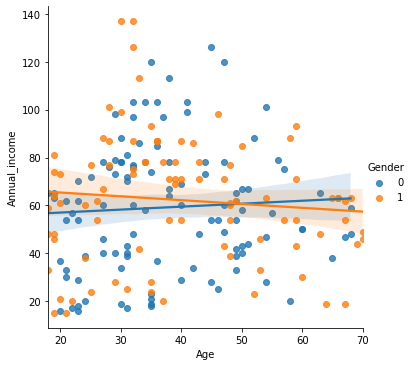

In [12]:
sns.lmplot(x = "Age", y = "Annual_income", data = df, hue = "Gender")

In this graphic we can clearly see how people in their thirties, forties and fifthies tend to earn more money annually than the ones younger than thirty or older than fifty years old. That is to say people whose age lays between thirty and fifty years old seem to get better jobs since they might be better prepared or be already more experienced than younglings or older people. In the graphic we can also see how males tend to earn a little bit more money than females, at least until fifty years old.

### Spending Score and Annual Income

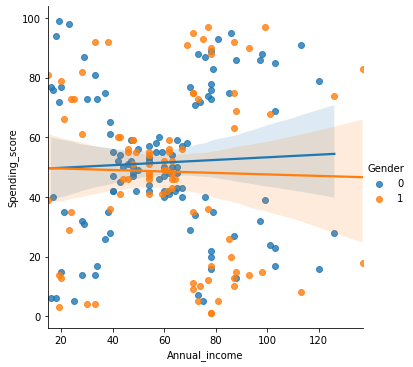

In [13]:
sns.lmplot(x = "Annual_income", y = "Spending_score", data = df, hue = "Gender")

Here we can observe how a better annual income leads to having a higher spending score, specially for women. However the correlation between these two variables isn't that big, we seem to find the majority of people in the middle, people who have decent salaries and have a reasonably high spending score.

### Age and Spending Score

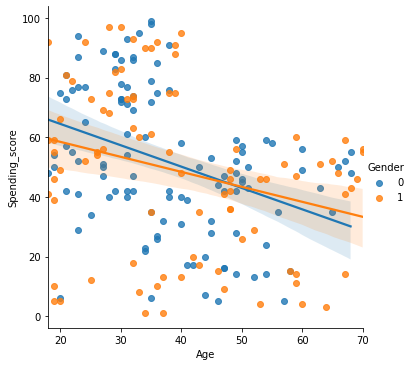

In [14]:
sns.lmplot(x = "Age", y = "Spending_score", data = df, hue = "Gender")

In this last graphic we get to see something we could predict, young people tend to spend way more than older people. That can be due to many reasons: young people usually have more free time than old people, shopping malls tend to have shops that target young people such as videogames and tech stores, etc.

## 6. Selecting Number of Clusters

Now that we have already understood this dataset a little bit it's time to decide the amount of clusters we want to divide our data in. To do so, we are going to use the Elbow Method.

In [15]:
#Creating values for the elbow
X = df.loc[:,["Age", "Annual_income", "Spending_score"]]
inertia = []
k = range(1,20)
for i in k:
    means_k = KMeans(n_clusters=i, random_state=0)
    means_k.fit(X)
    inertia.append(means_k.inertia_)

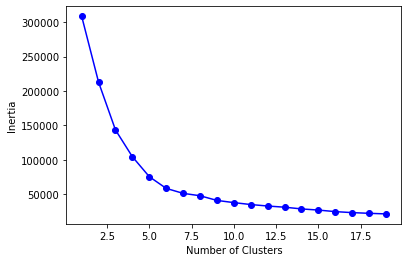

In [16]:
#Plotting the elbow
plt.plot(k , inertia , 'bo-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Although not found in the Thinkful course, this method was come across in OReilly's Unsupervized book.

The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k and one should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. In this problem, we are using the inertia as cost function in order to identify the sum of squared distances of samples to the nearest cluster centre.

Looking at this particular example, if we imagine the line in the graphic is an arm, the elbow can be found, approximately, where the number of clusters is equal to 5. Therefore we are selecting 5 as the number of clusters to divide our data in.

## 7. Clustering

In the process of clustering we will not be considering the gender factor anymore. The first main reason of why we do take this approach is because the difference between male and female in this data is not particularly high and making a gender differentiaton won't provide any further information. The second and not least important reason is the fact that stores, in general, hardly ever target a specific gender anymore, in almost every store in a shopping center male and female products can be found.

Additionally we do not want to interfere in the process of unsupervised learning, we will leave the algorithm do its job and once it's finished we will analyze the results and extract conclusions and knowledge.

In [52]:
#Training kmeans with 5 clusters
means_k = KMeans(n_clusters=5, random_state=123)
clusters_kmeans = means_k.fit_predict(X)
y = means_k.labels_
centroids = means_k.cluster_centers_

In [54]:
def cluster_metrics(clusters, model_name='ModelName', X=X, y=y, metric='euclidean'):
    print("Adjusted Rand Index of the {} solution: {}"
          .format(model_name, adjusted_rand_score(y, clusters)))
    print("The silhoutte score of the {} solution: {}"
          .format(model_name, silhouette_score(X, clusters, metric=metric)))

In [55]:
cluster_metrics(clusters_kmeans)

Adjusted Rand Index of the ModelName solution: 1.0
The silhoutte score of the ModelName solution: 0.44428597560893024


As we can observe, the K-means algorithm has already finished its work and now it's time to plot the results we obtained by it so we can visualize the different clusters and analyze them.

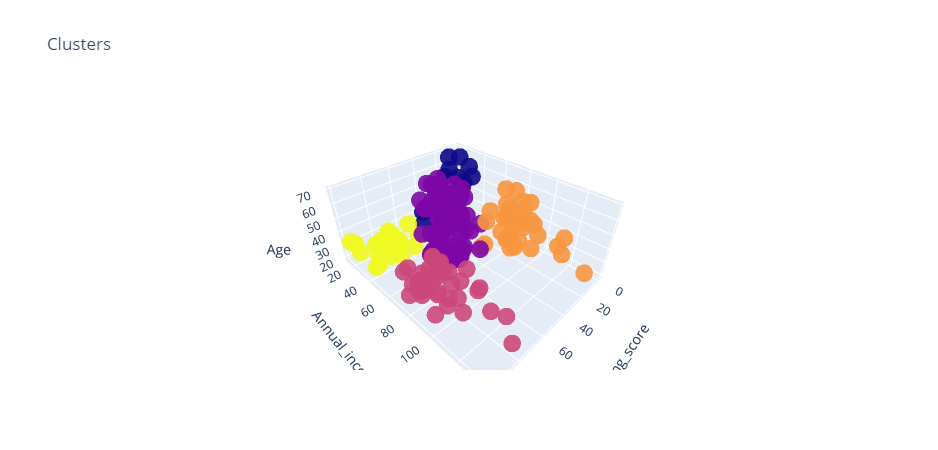

In [42]:
#Create a 3d plot to view the data sepparation made by Kmeans
trace1 = go.Scatter3d(
    x= X['Spending_score'],
    y= X['Annual_income'],
    z= X['Age'],
    mode='markers',
     marker=dict(
        color = labels, 
        size= 10,
        line=dict(
            color= labels,
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Spending_score'),
            yaxis = dict(title  = 'Annual_income'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)

Plot.ly doesn't work natively in Jupyter Notebook or Jupyter Lab without an extension.  So for those who cannot see the 3d scatterplot, I'll run dimensionality reduction and plot that instead.

In [41]:
pd.crosstab(labels, clusters_kmeans)

col_0,0,1,2,3,4
row_0,,,,,
0,0,0,0,0,23
1,79,0,0,0,0
2,0,0,0,39,0
3,0,0,36,0,0
4,0,23,0,0,0


In [34]:
pca_results = PCA(n_components=2).fit_transform(X)

In [38]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m"]
for i in range(pca_results.shape[0]):
    plt.text(pca_results[i, 0], pca_results[i, 1], str(labels[i]),
             color=colours[int(labels[i])],
             fontdict={'weight': 'bold', 'size': 500}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

ValueError: Image size of 77792x38953 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x360 with 1 Axes>

In [29]:
umap_results = umap.UMAP(n_neighbors=9,
                        min_dist=0.3,
                        metric='correlation').fit_transform(X)

In [30]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], labels[i],
             color=colours[int(labels[i])],
             fontdict={'weight': 'bold', 'size': 500}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

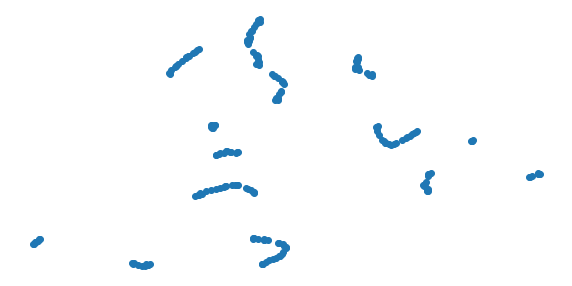

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()